In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset from CSV file
data = pd.read_csv('/content/fire_dataset_normal.csv')

# Separate the features (inputs) and the target (output)
X = data.drop('Fire', axis=1)
y = data['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features to ensure they are on the same scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 2s 33ms/step - loss: 0.6944 - accuracy: 0.5161 - val_loss: 0.6948 - val_accuracy: 0.4487
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6893 - accuracy: 0.5258 - val_loss: 0.6907 - val_accuracy: 0.6923
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.5645 - val_loss: 0.6856 - val_accuracy: 0.6923
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6836 - accuracy: 0.5903 - val_loss: 0.6775 - val_accuracy: 0.7308
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6776 - accuracy: 0.5774 - val_loss: 0.6689 - val_accuracy: 0.6538
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6744 - accuracy: 0.5935 - val_loss: 0.6635 - val_accuracy: 0.6538
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6644 - accuracy: 0.6129 - val_loss: 0.6576 - val_accuracy: 0.6410
Epoch 8/50
10/10 [=

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 1s 29ms/step - loss: 0.6859 - accuracy: 0.6258 - val_loss: 0.6814 - val_accuracy: 0.5897
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6770 - accuracy: 0.6258 - val_loss: 0.6760 - val_accuracy: 0.6410
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6696 - accuracy: 0.6387 - val_loss: 0.6690 - val_accuracy: 0.6282
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6616 - accuracy: 0.6387 - val_loss: 0.6624 - val_accuracy: 0.6410
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6516 - accuracy: 0.6645 - val_loss: 0.6570 - val_accuracy: 0.7051
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6438 - accuracy: 0.6774 - val_loss: 0.6515 - val_accuracy: 0.7179
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 0.6374 - accuracy: 0.6484 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 8/50
10

In [7]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.optimizers import Adam


def train_model(params):
    model = Sequential()
    model.add(Dense(units=params['units'], activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    loss = history.history['val_loss'][-1]
    return {'loss': loss, 'status': STATUS_OK}

space = {'lr': hp.loguniform('lr', -5, -1),
         'units': hp.quniform('units', 32, 128, 16)}

trials = Trials()
best = fmin(train_model, space, algo=tpe.suggest, max_evals=50, trials=trials)


  0%|          | 0/50 [00:00<?, ?it/s, best loss: ?]

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6939 - accuracy: 0.5161 - val_loss: 0.6871 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5677 - val_loss: 0.6795 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.6968 - val_loss: 0.6743 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.7323 - val_loss: 0.6685 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.7290 - val_loss: 0.6643 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6575 - accuracy: 0.7258 - val_loss: 0.6601 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6839 - val_loss: 0.6560 - val_accuracy: 0.7051

Epoch

Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6913 - accuracy: 0.5581 - val_loss: 0.6879 - val_accuracy: 0.6154

Epoch 2/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6855 - accuracy: 0.6226 - val_loss: 0.6837 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6804 - accuracy: 0.6129 - val_loss: 0.6798 - val_accuracy: 0.6410

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6757 - accuracy: 0.6452 - val_loss: 0.6765 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6710 - val_loss: 0.6731 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.6968 - val_loss: 0.6704 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6641 - accuracy: 0.6968 - val_loss: 0.6673 - val_accuracy: 0.7179

Epoch

Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.7154 - accuracy: 0.4839 - val_loss: 0.7182 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.7060 - accuracy: 0.4839 - val_loss: 0.7070 - val_accuracy: 0.4615

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6977 - accuracy: 0.4839 - val_loss: 0.7000 - val_accuracy: 0.4615

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.4839 - val_loss: 0.6941 - val_accuracy: 0.4487

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 0.5032 - val_loss: 0.6892 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.6903 - val_loss: 0.6855 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6807 - accuracy: 0.7290 - val_loss: 0.6822 - val_accuracy: 0.6923

Epoch

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.7002 - accuracy: 0.5161 - val_loss: 0.6947 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5161 - val_loss: 0.6892 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6860 - accuracy: 0.5161 - val_loss: 0.6852 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6807 - accuracy: 0.5452 - val_loss: 0.6823 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6766 - accuracy: 0.6065 - val_loss: 0.6794 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.6194 - val_loss: 0.6765 - val_accuracy: 0.5897

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.6323 - val_loss: 0.6742 - val_accuracy: 0.6282

Epoch

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6899 - accuracy: 0.6742 - val_loss: 0.6854 - val_accuracy: 0.7436

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6804 - accuracy: 0.7323 - val_loss: 0.6786 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6728 - accuracy: 0.7065 - val_loss: 0.6733 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6673 - accuracy: 0.7226 - val_loss: 0.6696 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6622 - accuracy: 0.6710 - val_loss: 0.6652 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.6484 - val_loss: 0.6625 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6533 - accuracy: 0.6613 - val_loss: 0.6602 - val_accuracy: 0.6923

E

Epoch 1/50

10/10 [==============================] - 2s 42ms/step - loss: 0.6803 - accuracy: 0.5806 - val_loss: 0.6782 - val_accuracy: 0.6154

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6709 - accuracy: 0.6935 - val_loss: 0.6723 - val_accuracy: 0.6667

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6636 - accuracy: 0.6806 - val_loss: 0.6670 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6579 - accuracy: 0.6645 - val_loss: 0.6626 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6532 - accuracy: 0.6710 - val_loss: 0.6593 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6487 - accuracy: 0.6581 - val_loss: 0.6555 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6454 - accuracy: 0.6484 - val_loss: 0.6526 - val_accuracy: 0.6667


Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 0.6832 - accuracy: 0.6806 - val_loss: 0.6816 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6755 - accuracy: 0.7226 - val_loss: 0.6753 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.6871 - val_loss: 0.6687 - val_accuracy: 0.6667

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6654 - accuracy: 0.6774 - val_loss: 0.6662 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6595 - accuracy: 0.6871 - val_loss: 0.6618 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6562 - accuracy: 0.6516 - val_loss: 0.6570 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6518 - accuracy: 0.6516 - val_loss: 0.6542 - val_accuracy: 0.6667

Epoch

Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6911 - accuracy: 0.4839 - val_loss: 0.6908 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.6258 - val_loss: 0.6849 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6790 - accuracy: 0.7258 - val_loss: 0.6800 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6739 - accuracy: 0.7290 - val_loss: 0.6764 - val_accuracy: 0.7308

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.7161 - val_loss: 0.6730 - val_accuracy: 0.7308

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6660 - accuracy: 0.6742 - val_loss: 0.6694 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6632 - accuracy: 0.6387 - val_loss: 0.6657 - val_accuracy: 0.6410

Epoc

Epoch 1/50

10/10 [==============================] - 2s 45ms/step - loss: 0.6898 - accuracy: 0.5129 - val_loss: 0.6885 - val_accuracy: 0.6282

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6820 - accuracy: 0.7161 - val_loss: 0.6811 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6751 - accuracy: 0.7290 - val_loss: 0.6753 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6696 - accuracy: 0.7000 - val_loss: 0.6712 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6646 - accuracy: 0.6935 - val_loss: 0.6683 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 17ms/step - loss: 0.6613 - accuracy: 0.7000 - val_loss: 0.6661 - val_accuracy: 0.7308

Epoch 7/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6565 - accuracy: 0.6968 - val_loss: 0.6623 - val_accuracy: 0.7051


Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 0.6966 - accuracy: 0.4065 - val_loss: 0.6925 - val_accuracy: 0.6538

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6886 - accuracy: 0.6613 - val_loss: 0.6861 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.6774 - val_loss: 0.6799 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.6548 - val_loss: 0.6754 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6701 - accuracy: 0.6968 - val_loss: 0.6719 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.7097 - val_loss: 0.6688 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6622 - accuracy: 0.6903 - val_loss: 0.6657 - val_accuracy: 0.6923

Epo

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6873 - accuracy: 0.6484 - val_loss: 0.6838 - val_accuracy: 0.7436

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.7226 - val_loss: 0.6782 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6724 - accuracy: 0.7194 - val_loss: 0.6733 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6669 - accuracy: 0.6774 - val_loss: 0.6678 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6615 - accuracy: 0.6516 - val_loss: 0.6640 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.6548 - val_loss: 0.6610 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6526 - accuracy: 0.6710 - val_loss: 0.6586 - val_accuracy: 0.7179

Epoch

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.6887 - accuracy: 0.6032 - val_loss: 0.6842 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6795 - accuracy: 0.6968 - val_loss: 0.6781 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6645 - val_loss: 0.6723 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6664 - accuracy: 0.6419 - val_loss: 0.6675 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.6419 - val_loss: 0.6639 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6558 - accuracy: 0.6484 - val_loss: 0.6616 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.6581 - val_loss: 0.6589 - val_accuracy: 0.6667

Epoch

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.6882 - accuracy: 0.5452 - val_loss: 0.6790 - val_accuracy: 0.6154

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.5774 - val_loss: 0.6729 - val_accuracy: 0.6538

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.6613 - val_loss: 0.6672 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.6806 - val_loss: 0.6633 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6592 - accuracy: 0.6935 - val_loss: 0.6583 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6539 - accuracy: 0.6742 - val_loss: 0.6537 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6486 - accuracy: 0.6677 - val_loss: 0.6498 - val_accuracy: 0.7051

Epoc

Epoch 1/50

10/10 [==============================] - 1s 39ms/step - loss: 0.6952 - accuracy: 0.4871 - val_loss: 0.6880 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6832 - accuracy: 0.6581 - val_loss: 0.6774 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6750 - accuracy: 0.6613 - val_loss: 0.6705 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6687 - accuracy: 0.6290 - val_loss: 0.6657 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6640 - accuracy: 0.6387 - val_loss: 0.6627 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6597 - accuracy: 0.6452 - val_loss: 0.6583 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6552 - accuracy: 0.6516 - val_loss: 0.6562 - val_accuracy: 0.6667


Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.7008 - accuracy: 0.4806 - val_loss: 0.6952 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.5935 - val_loss: 0.6863 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6820 - accuracy: 0.6387 - val_loss: 0.6802 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.6194 - val_loss: 0.6743 - val_accuracy: 0.6282

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.6226 - val_loss: 0.6695 - val_accuracy: 0.6154

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6633 - accuracy: 0.6129 - val_loss: 0.6657 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6595 - accuracy: 0.6194 - val_loss: 0.6621 - val_accuracy: 0.6282

Epo

Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 0.6711 - accuracy: 0.5387 - val_loss: 0.6700 - val_accuracy: 0.6282

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6659 - accuracy: 0.6097 - val_loss: 0.6669 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6604 - accuracy: 0.6290 - val_loss: 0.6641 - val_accuracy: 0.6410

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6563 - accuracy: 0.6419 - val_loss: 0.6614 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6519 - accuracy: 0.6484 - val_loss: 0.6589 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.6452 - val_loss: 0.6564 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6581 - val_loss: 0.6545 - val_accuracy: 0.6923

Ep

Epoch 1/50

10/10 [==============================] - 2s 48ms/step - loss: 0.7088 - accuracy: 0.5161 - val_loss: 0.7021 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6968 - accuracy: 0.5161 - val_loss: 0.6936 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6883 - accuracy: 0.5161 - val_loss: 0.6885 - val_accuracy: 0.5385

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6834 - accuracy: 0.5161 - val_loss: 0.6851 - val_accuracy: 0.5641

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.5323 - val_loss: 0.6827 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6764 - accuracy: 0.6419 - val_loss: 0.6807 - val_accuracy: 0.7436

Epoch 7/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6739 - accuracy: 0.7258 - val_loss: 0.6788 - val_accuracy: 0.7051


Epoch 1/50

10/10 [==============================] - 1s 32ms/step - loss: 0.6963 - accuracy: 0.5161 - val_loss: 0.6871 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6841 - accuracy: 0.6129 - val_loss: 0.6791 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 17ms/step - loss: 0.6737 - accuracy: 0.7097 - val_loss: 0.6722 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6669 - accuracy: 0.7323 - val_loss: 0.6670 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6610 - accuracy: 0.6871 - val_loss: 0.6617 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6552 - accuracy: 0.6839 - val_loss: 0.6590 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.7258 - val_loss: 0.6556 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6898 - accuracy: 0.5290 - val_loss: 0.6834 - val_accuracy: 0.6282

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6843 - accuracy: 0.6258 - val_loss: 0.6798 - val_accuracy: 0.6410

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.6645 - val_loss: 0.6767 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.6742 - val_loss: 0.6735 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6711 - accuracy: 0.7032 - val_loss: 0.6713 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6678 - accuracy: 0.7323 - val_loss: 0.6692 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6646 - accuracy: 0.6935 - val_loss: 0.6660 - val_accuracy: 0.7051

Epoc

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6995 - accuracy: 0.5161 - val_loss: 0.6956 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.5290 - val_loss: 0.6891 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.6645 - val_loss: 0.6838 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6752 - accuracy: 0.7032 - val_loss: 0.6793 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.7161 - val_loss: 0.6738 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6635 - accuracy: 0.6935 - val_loss: 0.6704 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.6871 - val_loss: 0.6668 - val_accuracy: 0.6795

Epo

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6852 - accuracy: 0.5613 - val_loss: 0.6796 - val_accuracy: 0.6923

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.7032 - val_loss: 0.6728 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.7194 - val_loss: 0.6664 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6607 - accuracy: 0.6613 - val_loss: 0.6612 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6551 - accuracy: 0.6548 - val_loss: 0.6582 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6501 - accuracy: 0.6548 - val_loss: 0.6544 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6460 - accuracy: 0.6613 - val_loss: 0.6506 - val_accuracy: 0.6667

Epoc

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6918 - accuracy: 0.5194 - val_loss: 0.6852 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6790 - accuracy: 0.6903 - val_loss: 0.6742 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6690 - accuracy: 0.6677 - val_loss: 0.6670 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6608 - accuracy: 0.6613 - val_loss: 0.6619 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6546 - accuracy: 0.6677 - val_loss: 0.6570 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6494 - accuracy: 0.6645 - val_loss: 0.6524 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6434 - accuracy: 0.6581 - val_loss: 0.6498 - val_accuracy: 0.7179

Epoc

Epoch 1/50

10/10 [==============================] - 2s 80ms/step - loss: 0.6798 - accuracy: 0.7194 - val_loss: 0.6773 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6698 - accuracy: 0.6516 - val_loss: 0.6687 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6623 - accuracy: 0.6194 - val_loss: 0.6626 - val_accuracy: 0.6282

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6555 - accuracy: 0.6419 - val_loss: 0.6591 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6516 - val_loss: 0.6550 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6484 - val_loss: 0.6520 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6411 - accuracy: 0.6516 - val_loss: 0.6493 - val_accuracy: 0.7051



Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.6979 - accuracy: 0.4839 - val_loss: 0.6897 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.6000 - val_loss: 0.6800 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6764 - accuracy: 0.7323 - val_loss: 0.6725 - val_accuracy: 0.7436

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.7129 - val_loss: 0.6659 - val_accuracy: 0.7436

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 0.6617 - accuracy: 0.7065 - val_loss: 0.6610 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.6806 - val_loss: 0.6570 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6519 - accuracy: 0.6710 - val_loss: 0.6527 - val_accuracy: 0.7051

Ep

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.6960 - accuracy: 0.4839 - val_loss: 0.6946 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.6581 - val_loss: 0.6849 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.6742 - val_loss: 0.6769 - val_accuracy: 0.6410

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6698 - accuracy: 0.6387 - val_loss: 0.6716 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6636 - accuracy: 0.6258 - val_loss: 0.6659 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.6290 - val_loss: 0.6615 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.6387 - val_loss: 0.6593 - val_accuracy: 0.6538

E

Epoch 1/50

10/10 [==============================] - 1s 45ms/step - loss: 0.6869 - accuracy: 0.5226 - val_loss: 0.6838 - val_accuracy: 0.5769

Epoch 2/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6788 - accuracy: 0.6355 - val_loss: 0.6788 - val_accuracy: 0.6795

Epoch 3/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6720 - accuracy: 0.6968 - val_loss: 0.6739 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6663 - accuracy: 0.6677 - val_loss: 0.6696 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6614 - accuracy: 0.6581 - val_loss: 0.6663 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6566 - accuracy: 0.6548 - val_loss: 0.6627 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6524 - accuracy: 0.6516 - val_loss: 0.6594 - val_accuracy: 0.6538


Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 0.6875 - accuracy: 0.5258 - val_loss: 0.6820 - val_accuracy: 0.6282

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6761 - accuracy: 0.6097 - val_loss: 0.6747 - val_accuracy: 0.6667

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6682 - accuracy: 0.6935 - val_loss: 0.6697 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6619 - accuracy: 0.7387 - val_loss: 0.6653 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6550 - accuracy: 0.7065 - val_loss: 0.6594 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6497 - accuracy: 0.6839 - val_loss: 0.6547 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6458 - accuracy: 0.7032 - val_loss: 0.6529 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 2s 48ms/step - loss: 0.6928 - accuracy: 0.5194 - val_loss: 0.6894 - val_accuracy: 0.6795

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6821 - accuracy: 0.7097 - val_loss: 0.6824 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 21ms/step - loss: 0.6736 - accuracy: 0.7226 - val_loss: 0.6766 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6670 - accuracy: 0.7323 - val_loss: 0.6727 - val_accuracy: 0.7308

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6616 - accuracy: 0.7355 - val_loss: 0.6694 - val_accuracy: 0.7308

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6569 - accuracy: 0.6903 - val_loss: 0.6637 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6527 - accuracy: 0.6710 - val_loss: 0.6605 - val_accuracy: 0.6795


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 0.6892 - accuracy: 0.5194 - val_loss: 0.6823 - val_accuracy: 0.5641

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.6097 - val_loss: 0.6755 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6703 - accuracy: 0.7194 - val_loss: 0.6689 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6641 - accuracy: 0.7194 - val_loss: 0.6645 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6575 - accuracy: 0.7194 - val_loss: 0.6590 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6523 - accuracy: 0.6742 - val_loss: 0.6537 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6468 - accuracy: 0.6613 - val_loss: 0.6509 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 0.6831 - accuracy: 0.6677 - val_loss: 0.6770 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6725 - accuracy: 0.7065 - val_loss: 0.6691 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6642 - accuracy: 0.7097 - val_loss: 0.6632 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6575 - accuracy: 0.7290 - val_loss: 0.6592 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.7258 - val_loss: 0.6541 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6462 - accuracy: 0.7097 - val_loss: 0.6500 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6411 - accuracy: 0.7129 - val_loss: 0.6455 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 0.6981 - accuracy: 0.4742 - val_loss: 0.6945 - val_accuracy: 0.4359

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6880 - accuracy: 0.6065 - val_loss: 0.6863 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6795 - accuracy: 0.7226 - val_loss: 0.6792 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6721 - accuracy: 0.6903 - val_loss: 0.6732 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6666 - accuracy: 0.6548 - val_loss: 0.6689 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6618 - accuracy: 0.6581 - val_loss: 0.6661 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6572 - accuracy: 0.6806 - val_loss: 0.6629 - val_accuracy: 0.7051



Epoch 1/50

10/10 [==============================] - 2s 51ms/step - loss: 0.6910 - accuracy: 0.5323 - val_loss: 0.6867 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6816 - accuracy: 0.6839 - val_loss: 0.6797 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6748 - accuracy: 0.6710 - val_loss: 0.6743 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6685 - accuracy: 0.6710 - val_loss: 0.6693 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 25ms/step - loss: 0.6638 - accuracy: 0.6516 - val_loss: 0.6653 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6596 - accuracy: 0.6548 - val_loss: 0.6620 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6563 - accuracy: 0.6613 - val_loss: 0.6592 - val_accuracy: 0.6795


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6933 - accuracy: 0.5452 - val_loss: 0.6881 - val_accuracy: 0.6538

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6833 - accuracy: 0.7226 - val_loss: 0.6813 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.6871 - val_loss: 0.6753 - val_accuracy: 0.6667

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6484 - val_loss: 0.6704 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6655 - accuracy: 0.6484 - val_loss: 0.6665 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6611 - accuracy: 0.6484 - val_loss: 0.6632 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6572 - accuracy: 0.6452 - val_loss: 0.6595 - val_accuracy: 0.6410



Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6926 - accuracy: 0.4839 - val_loss: 0.6880 - val_accuracy: 0.6410

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6814 - accuracy: 0.7161 - val_loss: 0.6791 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.7065 - val_loss: 0.6713 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6647 - accuracy: 0.7129 - val_loss: 0.6666 - val_accuracy: 0.7308

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6599 - accuracy: 0.7032 - val_loss: 0.6629 - val_accuracy: 0.7308

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6548 - accuracy: 0.6677 - val_loss: 0.6583 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6511 - accuracy: 0.6548 - val_loss: 0.6558 - val_accuracy: 0.6923


Epoch 1/50

10/10 [==============================] - 2s 44ms/step - loss: 0.6958 - accuracy: 0.5161 - val_loss: 0.6863 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6820 - accuracy: 0.5742 - val_loss: 0.6789 - val_accuracy: 0.6026

Epoch 3/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6737 - accuracy: 0.6290 - val_loss: 0.6728 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6664 - accuracy: 0.6548 - val_loss: 0.6686 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6614 - accuracy: 0.6968 - val_loss: 0.6654 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 19ms/step - loss: 0.6553 - accuracy: 0.6774 - val_loss: 0.6599 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 19ms/step - loss: 0.6503 - accuracy: 0.6581 - val_loss: 0.6562 - val_accuracy: 0.6795


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.7049 - accuracy: 0.3097 - val_loss: 0.6998 - val_accuracy: 0.3462

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6974 - accuracy: 0.3548 - val_loss: 0.6952 - val_accuracy: 0.3590

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6917 - accuracy: 0.5710 - val_loss: 0.6909 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.6871 - val_loss: 0.6876 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6829 - accuracy: 0.7129 - val_loss: 0.6853 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6792 - accuracy: 0.7097 - val_loss: 0.6824 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6765 - accuracy: 0.6935 - val_loss: 0.6797 - val_accuracy: 0.6923


Epoch 1/50

10/10 [==============================] - 1s 31ms/step - loss: 0.6842 - accuracy: 0.7000 - val_loss: 0.6820 - val_accuracy: 0.6923

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6740 - accuracy: 0.6903 - val_loss: 0.6752 - val_accuracy: 0.6795

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6666 - accuracy: 0.6419 - val_loss: 0.6685 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6600 - accuracy: 0.6290 - val_loss: 0.6639 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6549 - accuracy: 0.6419 - val_loss: 0.6611 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6492 - accuracy: 0.6419 - val_loss: 0.6567 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6447 - accuracy: 0.6290 - val_loss: 0.6526 - val_accuracy: 0.6282


Epoch 1/50

10/10 [==============================] - 2s 45ms/step - loss: 0.7011 - accuracy: 0.4839 - val_loss: 0.6995 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.4839 - val_loss: 0.6915 - val_accuracy: 0.4487

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6848 - accuracy: 0.6032 - val_loss: 0.6857 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6786 - accuracy: 0.7290 - val_loss: 0.6810 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6736 - accuracy: 0.7258 - val_loss: 0.6759 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6687 - accuracy: 0.7323 - val_loss: 0.6722 - val_accuracy: 0.7308

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6646 - accuracy: 0.7226 - val_loss: 0.6690 - val_accuracy: 0.7308


Epoch 1/50

10/10 [==============================] - 1s 33ms/step - loss: 0.6917 - accuracy: 0.6000 - val_loss: 0.6877 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.6645 - val_loss: 0.6800 - val_accuracy: 0.6667

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6747 - accuracy: 0.7000 - val_loss: 0.6748 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6684 - accuracy: 0.6677 - val_loss: 0.6697 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6638 - accuracy: 0.6452 - val_loss: 0.6659 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6599 - accuracy: 0.6387 - val_loss: 0.6612 - val_accuracy: 0.6282

Epoch 7/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6555 - accuracy: 0.6290 - val_loss: 0.6587 - val_accuracy: 0.6538


Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 0.7009 - accuracy: 0.3710 - val_loss: 0.6952 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6899 - accuracy: 0.6194 - val_loss: 0.6868 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6806 - accuracy: 0.7258 - val_loss: 0.6808 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.7258 - val_loss: 0.6761 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.7097 - val_loss: 0.6716 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.6839 - val_loss: 0.6665 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6573 - accuracy: 0.6645 - val_loss: 0.6623 - val_accuracy: 0.6795


Epoch 1/50

10/10 [==============================] - 2s 41ms/step - loss: 0.6936 - accuracy: 0.5065 - val_loss: 0.6858 - val_accuracy: 0.6154

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6828 - accuracy: 0.6097 - val_loss: 0.6772 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6738 - accuracy: 0.6613 - val_loss: 0.6709 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 18ms/step - loss: 0.6668 - accuracy: 0.7032 - val_loss: 0.6670 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 17ms/step - loss: 0.6596 - accuracy: 0.7161 - val_loss: 0.6616 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6539 - accuracy: 0.6710 - val_loss: 0.6568 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 16ms/step - loss: 0.6489 - accuracy: 0.6645 - val_loss: 0.6533 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 0.6841 - accuracy: 0.7065 - val_loss: 0.6832 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6757 - accuracy: 0.6935 - val_loss: 0.6758 - val_accuracy: 0.6795

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6679 - accuracy: 0.6839 - val_loss: 0.6701 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6611 - accuracy: 0.7097 - val_loss: 0.6648 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6547 - accuracy: 0.7065 - val_loss: 0.6597 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6492 - accuracy: 0.6613 - val_loss: 0.6548 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6451 - accuracy: 0.6548 - val_loss: 0.6506 - val_accuracy: 0.6795


Epoch 1/50

10/10 [==============================] - 2s 36ms/step - loss: 0.6850 - accuracy: 0.5548 - val_loss: 0.6803 - val_accuracy: 0.5897

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6749 - accuracy: 0.6806 - val_loss: 0.6745 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6672 - accuracy: 0.7258 - val_loss: 0.6698 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6606 - accuracy: 0.7129 - val_loss: 0.6648 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6563 - accuracy: 0.6742 - val_loss: 0.6605 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6535 - accuracy: 0.6323 - val_loss: 0.6561 - val_accuracy: 0.6282

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6475 - accuracy: 0.6516 - val_loss: 0.6553 - val_accuracy: 0.7051


Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 0.6961 - accuracy: 0.5161 - val_loss: 0.6860 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6825 - accuracy: 0.5194 - val_loss: 0.6781 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6747 - accuracy: 0.6097 - val_loss: 0.6732 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6686 - accuracy: 0.7258 - val_loss: 0.6699 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6633 - accuracy: 0.7258 - val_loss: 0.6655 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6585 - accuracy: 0.7000 - val_loss: 0.6616 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6547 - accuracy: 0.6452 - val_loss: 0.6568 - val_accuracy: 0.6282


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6914 - accuracy: 0.4806 - val_loss: 0.6909 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.6645 - val_loss: 0.6805 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6732 - accuracy: 0.7161 - val_loss: 0.6729 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6671 - accuracy: 0.6806 - val_loss: 0.6671 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6616 - accuracy: 0.6645 - val_loss: 0.6622 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6568 - accuracy: 0.6548 - val_loss: 0.6587 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6548 - val_loss: 0.6561 - val_accuracy: 0.7051


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.7058 - accuracy: 0.4839 - val_loss: 0.7018 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6988 - accuracy: 0.4839 - val_loss: 0.6961 - val_accuracy: 0.4359

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6927 - accuracy: 0.4935 - val_loss: 0.6913 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.6581 - val_loss: 0.6867 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6852 - accuracy: 0.6065 - val_loss: 0.6830 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.5871 - val_loss: 0.6811 - val_accuracy: 0.6026

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6792 - accuracy: 0.6065 - val_loss: 0.6797 - val_accuracy: 0.6282


Epoch 1/50

10/10 [==============================] - 3s 70ms/step - loss: 0.6916 - accuracy: 0.4839 - val_loss: 0.6871 - val_accuracy: 0.4744

Epoch 2/50

10/10 [==============================] - 0s 41ms/step - loss: 0.6840 - accuracy: 0.6742 - val_loss: 0.6802 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 31ms/step - loss: 0.6771 - accuracy: 0.7226 - val_loss: 0.6739 - val_accuracy: 0.7436

Epoch 4/50

10/10 [==============================] - 0s 38ms/step - loss: 0.6709 - accuracy: 0.7129 - val_loss: 0.6693 - val_accuracy: 0.7436

Epoch 5/50

10/10 [==============================] - 0s 32ms/step - loss: 0.6654 - accuracy: 0.7000 - val_loss: 0.6645 - val_accuracy: 0.7308

Epoch 6/50

10/10 [==============================] - 1s 61ms/step - loss: 0.6611 - accuracy: 0.6903 - val_loss: 0.6599 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 52ms/step - loss: 0.6565 - accuracy: 0.6806 - val_loss: 0.6580 - val_accuracy: 0.7179


Epoch 1/50

10/10 [==============================] - 1s 37ms/step - loss: 0.6839 - accuracy: 0.6742 - val_loss: 0.6822 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6750 - accuracy: 0.7161 - val_loss: 0.6744 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6679 - accuracy: 0.6903 - val_loss: 0.6681 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6613 - accuracy: 0.6581 - val_loss: 0.6629 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6563 - accuracy: 0.6839 - val_loss: 0.6601 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.6645 - val_loss: 0.6553 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6478 - accuracy: 0.6484 - val_loss: 0.6516 - val_accuracy: 0.6538


Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 0.6863 - accuracy: 0.5839 - val_loss: 0.6837 - val_accuracy: 0.7308

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6759 - accuracy: 0.7194 - val_loss: 0.6755 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 14ms/step - loss: 0.6685 - accuracy: 0.6645 - val_loss: 0.6699 - val_accuracy: 0.6667

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6625 - accuracy: 0.6452 - val_loss: 0.6656 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.6613 - val_loss: 0.6640 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6534 - accuracy: 0.6581 - val_loss: 0.6579 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6495 - accuracy: 0.6387 - val_loss: 0.6556 - val_accuracy: 0.6538


Epoch 1/50

10/10 [==============================] - 1s 32ms/step - loss: 0.6946 - accuracy: 0.5161 - val_loss: 0.6868 - val_accuracy: 0.5769

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 0.6878 - accuracy: 0.5258 - val_loss: 0.6817 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6818 - accuracy: 0.6129 - val_loss: 0.6775 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6767 - accuracy: 0.6581 - val_loss: 0.6745 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 15ms/step - loss: 0.6726 - accuracy: 0.7032 - val_loss: 0.6717 - val_accuracy: 0.7308

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.6685 - accuracy: 0.7290 - val_loss: 0.6689 - val_accuracy: 0.7308

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6935 - val_loss: 0.6654 - val_accuracy: 0.7051


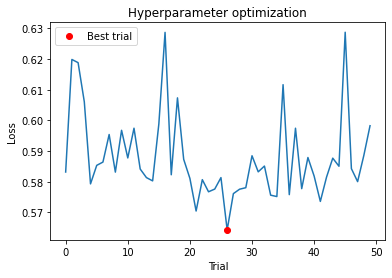

In [8]:
import matplotlib.pyplot as plt

# Get the loss values from the trials object
loss = [trial['result']['loss'] for trial in trials.trials]

# Get the index of the best trial
best_trial_index = loss.index(min(loss))

# Plot the loss values
plt.plot(loss)
plt.plot([best_trial_index], [min(loss)], 'ro', label='Best trial')
plt.title('Hyperparameter optimization')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.legend()
plt.show()


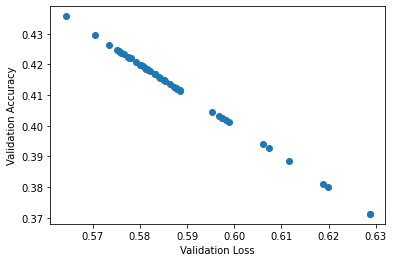

In [14]:
accs = [1 - trial['result']['loss'] for trial in trials]
losses = [trial['result']['loss'] for trial in trials]
plt.scatter(losses, accs)
plt.xlabel('Validation Loss')
plt.ylabel('Validation Accuracy')
plt.show()

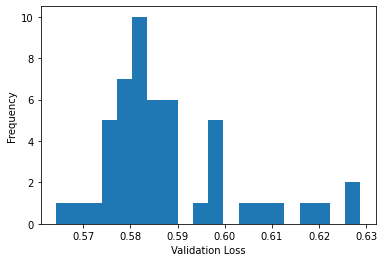

In [15]:
import matplotlib.pyplot as plt

losses = [trial['result']['loss'] for trial in trials]
plt.hist(losses, bins=20)
plt.xlabel('Validation Loss')
plt.ylabel('Frequency')
plt.show()

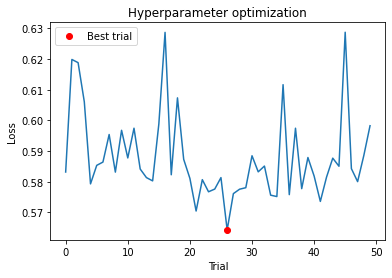

In [16]:
import matplotlib.pyplot as plt

# Get the loss values from the trials object
loss = [trial['result']['loss'] for trial in trials.trials]

# Get the index of the best trial
best_trial_index = loss.index(min(loss))

# Plot the loss values
plt.plot(loss)
plt.plot([best_trial_index], [min(loss)], 'ro', label='Best trial')
plt.title('Hyperparameter optimization')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.8144
Test loss: 0.49207133054733276
Test accuracy: 0.8144329786300659
4/4 [==============================] - 0s 4ms/step


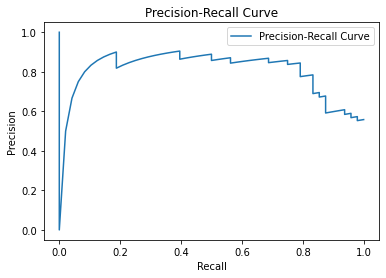

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Predict probabilities for the test data
y_pred = model.predict(X_test)

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.8144
Test loss: 0.49207133054733276
Test accuracy: 0.8144329786300659
4/4 [==============================] - 0s 3ms/step
ROC AUC: 0.842687074829932


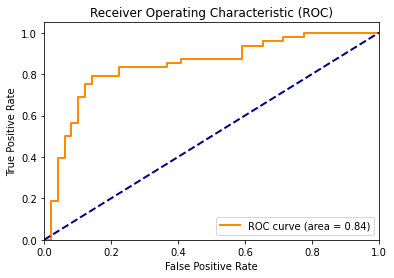

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Generate predicted probabilities for the test data
y_pred = model.predict(X_test)

# Calculate false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)
print('ROC AUC:', roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s, best loss: ?]

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 1.5376 - accuracy: 0.5161 - val_loss: 1.4979 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 1.4736 - accuracy: 0.5387 - val_loss: 1.4369 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 6ms/step - loss: 1.4125 - accuracy: 0.6355 - val_loss: 1.3784 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 6ms/step - loss: 1.3540 - accuracy: 0.6419 - val_loss: 1.3220 - val_accuracy: 0.6282

Epoch 5/50

10/10 [==============================] - 0s 6ms/step - loss: 1.2990 - accuracy: 0.6419 - val_loss: 1.2694 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 6ms/step - loss: 1.2466 - accuracy: 0.6548 - val_loss: 1.2187 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 1.1964 - accuracy: 0.6742 - val_loss: 1.1706 - val_accuracy: 0.6923

Epoc

Epoch 1/50

10/10 [==============================] - 2s 115ms/step - loss: 2.7406 - accuracy: 0.4710 - val_loss: 2.6442 - val_accuracy: 0.4103

Epoch 2/50

10/10 [==============================] - 0s 15ms/step - loss: 2.5721 - accuracy: 0.4871 - val_loss: 2.4810 - val_accuracy: 0.6410

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 2.4115 - accuracy: 0.6774 - val_loss: 2.3246 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 2.2575 - accuracy: 0.5968 - val_loss: 2.1735 - val_accuracy: 0.5641

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 2.1095 - accuracy: 0.5839 - val_loss: 2.0301 - val_accuracy: 0.5769

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 1.9688 - accuracy: 0.5806 - val_loss: 1.8921 - val_accuracy: 0.5513

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 1.8348 - accuracy: 0.5710 - val_loss: 1.7623 - val_accuracy: 0.5385



Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 17.5027 - accuracy: 0.7129 - val_loss: 16.6112 - val_accuracy: 0.7179

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 15.9355 - accuracy: 0.6968 - val_loss: 15.0810 - val_accuracy: 0.6538

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 14.4439 - accuracy: 0.6226 - val_loss: 13.6326 - val_accuracy: 0.6026

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 13.0110 - accuracy: 0.6226 - val_loss: 12.2296 - val_accuracy: 0.6026

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 11.6440 - accuracy: 0.6323 - val_loss: 10.9000 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 10.3441 - accuracy: 0.5968 - val_loss: 9.6392 - val_accuracy: 0.5897

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 9.1182 - accuracy: 0.6000 - val_loss: 8.4668 - val_accurac

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 2.3489 - accuracy: 0.4839 - val_loss: 2.2896 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 2.2412 - accuracy: 0.4903 - val_loss: 2.1832 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 2.1360 - accuracy: 0.7194 - val_loss: 2.0797 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.0342 - accuracy: 0.7161 - val_loss: 1.9809 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 1.9376 - accuracy: 0.6774 - val_loss: 1.8871 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 1.8456 - accuracy: 0.6387 - val_loss: 1.7957 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 1.7562 - accuracy: 0.6258 - val_loss: 1.7088 - val_accuracy: 0.6538

Epoch

Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 8.4212 - accuracy: 0.5194 - val_loss: 8.0953 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 7.8608 - accuracy: 0.5194 - val_loss: 7.5510 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 7ms/step - loss: 7.3255 - accuracy: 0.5194 - val_loss: 7.0294 - val_accuracy: 0.5641

Epoch 4/50

10/10 [==============================] - 0s 7ms/step - loss: 6.8101 - accuracy: 0.5226 - val_loss: 6.5260 - val_accuracy: 0.5897

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 6.3176 - accuracy: 0.5452 - val_loss: 6.0493 - val_accuracy: 0.6282

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 5.8538 - accuracy: 0.5968 - val_loss: 5.6002 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 5.4112 - accuracy: 0.6677 - val_loss: 5.1745 - val_accuracy: 0.6667

Epoch

Epoch 1/50

10/10 [==============================] - 1s 27ms/step - loss: 1.1133 - accuracy: 0.5161 - val_loss: 1.0894 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0755 - accuracy: 0.5194 - val_loss: 1.0564 - val_accuracy: 0.5769

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0422 - accuracy: 0.5226 - val_loss: 1.0260 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0122 - accuracy: 0.6613 - val_loss: 0.9986 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9846 - accuracy: 0.7161 - val_loss: 0.9725 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 0.9577 - accuracy: 0.7065 - val_loss: 0.9464 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9320 - accuracy: 0.7290 - val_loss: 0.9230 - val_accuracy: 0.6923

Epoch

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 2.2010 - accuracy: 0.4645 - val_loss: 2.1476 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 2.1058 - accuracy: 0.5677 - val_loss: 2.0547 - val_accuracy: 0.5769

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 2.0142 - accuracy: 0.5806 - val_loss: 1.9646 - val_accuracy: 0.5385

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.9247 - accuracy: 0.5968 - val_loss: 1.8769 - val_accuracy: 0.5641

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 1.8381 - accuracy: 0.5968 - val_loss: 1.7927 - val_accuracy: 0.5769

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 1.7561 - accuracy: 0.5903 - val_loss: 1.7124 - val_accuracy: 0.5769

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 1.6778 - accuracy: 0.5839 - val_loss: 1.6367 - val_accuracy: 0.5641

Epoc

Epoch 1/50

10/10 [==============================] - 2s 42ms/step - loss: 2.1921 - accuracy: 0.5161 - val_loss: 2.1134 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 2.0597 - accuracy: 0.5161 - val_loss: 1.9866 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.9354 - accuracy: 0.5161 - val_loss: 1.8654 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 1.8159 - accuracy: 0.5161 - val_loss: 1.7508 - val_accuracy: 0.5641

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.7047 - accuracy: 0.5387 - val_loss: 1.6437 - val_accuracy: 0.6282

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.6004 - accuracy: 0.5645 - val_loss: 1.5437 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 1.5025 - accuracy: 0.6194 - val_loss: 1.4488 - val_accuracy: 0.6410



Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 1.3624 - accuracy: 0.5194 - val_loss: 1.3254 - val_accuracy: 0.5641

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.2989 - accuracy: 0.5226 - val_loss: 1.2666 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 1.2406 - accuracy: 0.5323 - val_loss: 1.2109 - val_accuracy: 0.6282

Epoch 4/50

10/10 [==============================] - 0s 7ms/step - loss: 1.1856 - accuracy: 0.6452 - val_loss: 1.1588 - val_accuracy: 0.6667

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1342 - accuracy: 0.6871 - val_loss: 1.1096 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.0852 - accuracy: 0.6516 - val_loss: 1.0627 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 1.0395 - accuracy: 0.6452 - val_loss: 1.0185 - val_accuracy: 0.6282

Epoch

Epoch 1/50

10/10 [==============================] - 2s 39ms/step - loss: 1.1124 - accuracy: 0.4839 - val_loss: 1.0980 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0837 - accuracy: 0.4968 - val_loss: 1.0698 - val_accuracy: 0.5128

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0574 - accuracy: 0.6548 - val_loss: 1.0431 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 1.0328 - accuracy: 0.5935 - val_loss: 1.0195 - val_accuracy: 0.5897

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0100 - accuracy: 0.5645 - val_loss: 0.9983 - val_accuracy: 0.5769

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9889 - accuracy: 0.5645 - val_loss: 0.9784 - val_accuracy: 0.5897

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9692 - accuracy: 0.5903 - val_loss: 0.9597 - val_accuracy: 0.6282



Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 2.3083 - accuracy: 0.4903 - val_loss: 2.2622 - val_accuracy: 0.6538

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 2.2206 - accuracy: 0.6484 - val_loss: 2.1764 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 6ms/step - loss: 2.1370 - accuracy: 0.7194 - val_loss: 2.0927 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.0555 - accuracy: 0.7226 - val_loss: 2.0110 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 1.9760 - accuracy: 0.6871 - val_loss: 1.9327 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.9000 - accuracy: 0.6677 - val_loss: 1.8592 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 1.8282 - accuracy: 0.6613 - val_loss: 1.7885 - val_accuracy: 0.6795

Epoch

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 3.3018 - accuracy: 0.4806 - val_loss: 3.2194 - val_accuracy: 0.4744

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 3.1492 - accuracy: 0.5935 - val_loss: 3.0687 - val_accuracy: 0.6795

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 3.0008 - accuracy: 0.7161 - val_loss: 2.9221 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.8563 - accuracy: 0.7032 - val_loss: 2.7804 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 2.7179 - accuracy: 0.6419 - val_loss: 2.6433 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 2.5825 - accuracy: 0.6290 - val_loss: 2.5092 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 2.4499 - accuracy: 0.6129 - val_loss: 2.3798 - val_accuracy: 0.6282

Epoch

Epoch 1/50

10/10 [==============================] - 1s 39ms/step - loss: 9.3447 - accuracy: 0.4871 - val_loss: 8.8733 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 8.5231 - accuracy: 0.6355 - val_loss: 8.0767 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 7.7465 - accuracy: 0.5968 - val_loss: 7.3262 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 7.0105 - accuracy: 0.5871 - val_loss: 6.6086 - val_accuracy: 0.5641

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 6.3126 - accuracy: 0.5871 - val_loss: 5.9337 - val_accuracy: 0.5769

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 5.6552 - accuracy: 0.6032 - val_loss: 5.2998 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 5.0438 - accuracy: 0.6000 - val_loss: 4.7194 - val_accuracy: 0.6026


Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 1.3230 - accuracy: 0.5065 - val_loss: 1.3024 - val_accuracy: 0.5641

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.2851 - accuracy: 0.5290 - val_loss: 1.2660 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 7ms/step - loss: 1.2490 - accuracy: 0.5742 - val_loss: 1.2309 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.2145 - accuracy: 0.6290 - val_loss: 1.1980 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 7ms/step - loss: 1.1815 - accuracy: 0.6387 - val_loss: 1.1657 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1498 - accuracy: 0.6484 - val_loss: 1.1349 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1196 - accuracy: 0.6419 - val_loss: 1.1060 - val_accuracy: 0.6410

Epoch

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 2.2219 - accuracy: 0.5161 - val_loss: 2.1487 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 2.0975 - accuracy: 0.5161 - val_loss: 2.0297 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 1.9801 - accuracy: 0.5290 - val_loss: 1.9152 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.8676 - accuracy: 0.5548 - val_loss: 1.8082 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 1.7626 - accuracy: 0.6355 - val_loss: 1.7068 - val_accuracy: 0.7436

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 1.6630 - accuracy: 0.6387 - val_loss: 1.6100 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 1.5680 - accuracy: 0.6871 - val_loss: 1.5171 - val_accuracy: 0.7051

Ep

Epoch 1/50

10/10 [==============================] - 2s 88ms/step - loss: 9.4455 - accuracy: 0.5161 - val_loss: 9.1459 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 8.9266 - accuracy: 0.5161 - val_loss: 8.6392 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 8.4253 - accuracy: 0.5161 - val_loss: 8.1469 - val_accuracy: 0.5385

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 7.9363 - accuracy: 0.5161 - val_loss: 7.6665 - val_accuracy: 0.5513

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 7.4654 - accuracy: 0.5194 - val_loss: 7.2063 - val_accuracy: 0.5513

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 7.0111 - accuracy: 0.5194 - val_loss: 6.7647 - val_accuracy: 0.5769

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 6.5751 - accuracy: 0.5645 - val_loss: 6.3303 - val_accuracy: 0.6282

Epo

Epoch 1/50

10/10 [==============================] - 1s 31ms/step - loss: 3.4672 - accuracy: 0.5161 - val_loss: 3.3405 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 3.2487 - accuracy: 0.5161 - val_loss: 3.1290 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 3.0401 - accuracy: 0.5161 - val_loss: 2.9284 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 2.8442 - accuracy: 0.5194 - val_loss: 2.7375 - val_accuracy: 0.5513

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 2.6584 - accuracy: 0.5194 - val_loss: 2.5604 - val_accuracy: 0.5641

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 2.4859 - accuracy: 0.5194 - val_loss: 2.3934 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 2.3219 - accuracy: 0.5903 - val_loss: 2.2347 - val_accuracy: 0.6795

Epoch

Epoch 1/50

10/10 [==============================] - 1s 43ms/step - loss: 2.0478 - accuracy: 0.4226 - val_loss: 1.9765 - val_accuracy: 0.6154

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 1.9235 - accuracy: 0.6419 - val_loss: 1.8569 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 1.8065 - accuracy: 0.6161 - val_loss: 1.7443 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 1.6971 - accuracy: 0.6194 - val_loss: 1.6394 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 1.5944 - accuracy: 0.6323 - val_loss: 1.5400 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 1.4972 - accuracy: 0.6258 - val_loss: 1.4457 - val_accuracy: 0.6282

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 1.4060 - accuracy: 0.6323 - val_loss: 1.3582 - val_accuracy: 0.6410


Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 9.7943 - accuracy: 0.5161 - val_loss: 9.5330 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 9.3401 - accuracy: 0.5161 - val_loss: 9.0855 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 8.9012 - accuracy: 0.5161 - val_loss: 8.6619 - val_accuracy: 0.5385

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 8.4779 - accuracy: 0.5161 - val_loss: 8.2393 - val_accuracy: 0.5385

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 8.0581 - accuracy: 0.5161 - val_loss: 7.8269 - val_accuracy: 0.5385

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 7.6519 - accuracy: 0.5161 - val_loss: 7.4285 - val_accuracy: 0.5513

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 7.2614 - accuracy: 0.5194 - val_loss: 7.0480 - val_accuracy: 0.5513

Epoch

Epoch 1/50

10/10 [==============================] - 2s 41ms/step - loss: 1.7873 - accuracy: 0.3129 - val_loss: 1.7209 - val_accuracy: 0.3590

Epoch 2/50

10/10 [==============================] - 0s 14ms/step - loss: 1.6801 - accuracy: 0.4065 - val_loss: 1.6191 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 14ms/step - loss: 1.5808 - accuracy: 0.5161 - val_loss: 1.5238 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 1.4885 - accuracy: 0.5161 - val_loss: 1.4358 - val_accuracy: 0.5513

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 1.4034 - accuracy: 0.5194 - val_loss: 1.3539 - val_accuracy: 0.5513

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 1.3239 - accuracy: 0.5194 - val_loss: 1.2778 - val_accuracy: 0.5513

Epoch 7/50

10/10 [==============================] - 0s 16ms/step - loss: 1.2497 - accuracy: 0.5065 - val_loss: 1.2069 - val_accuracy: 0.5256


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 1.0025 - accuracy: 0.5161 - val_loss: 0.9881 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 7ms/step - loss: 0.9779 - accuracy: 0.5161 - val_loss: 0.9663 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9552 - accuracy: 0.5194 - val_loss: 0.9458 - val_accuracy: 0.5641

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9341 - accuracy: 0.6032 - val_loss: 0.9267 - val_accuracy: 0.6154

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9143 - accuracy: 0.6419 - val_loss: 0.9082 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.8958 - accuracy: 0.6258 - val_loss: 0.8910 - val_accuracy: 0.6026

Epoch 7/50

10/10 [==============================] - 0s 7ms/step - loss: 0.8791 - accuracy: 0.6419 - val_loss: 0.8755 - val_accuracy: 0.6538

Epo

Epoch 1/50

10/10 [==============================] - 2s 41ms/step - loss: 1.0145 - accuracy: 0.5161 - val_loss: 1.0028 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9904 - accuracy: 0.5258 - val_loss: 0.9803 - val_accuracy: 0.6026

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9681 - accuracy: 0.5968 - val_loss: 0.9588 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9465 - accuracy: 0.6032 - val_loss: 0.9395 - val_accuracy: 0.6154

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9266 - accuracy: 0.6323 - val_loss: 0.9210 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 0.9074 - accuracy: 0.6419 - val_loss: 0.9030 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 0.8892 - accuracy: 0.6516 - val_loss: 0.8864 - val_accuracy: 0.6667


Epoch 1/50

10/10 [==============================] - 1s 37ms/step - loss: 1.0366 - accuracy: 0.5161 - val_loss: 1.0197 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0106 - accuracy: 0.5161 - val_loss: 0.9972 - val_accuracy: 0.5513

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9877 - accuracy: 0.5194 - val_loss: 0.9772 - val_accuracy: 0.5641

Epoch 4/50

10/10 [==============================] - 0s 14ms/step - loss: 0.9678 - accuracy: 0.6548 - val_loss: 0.9583 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 0.9476 - accuracy: 0.7387 - val_loss: 0.9396 - val_accuracy: 0.6795

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9286 - accuracy: 0.7419 - val_loss: 0.9215 - val_accuracy: 0.7179

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9101 - accuracy: 0.7419 - val_loss: 0.9040 - val_accuracy: 0.6923


Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 1.0692 - accuracy: 0.4742 - val_loss: 1.0544 - val_accuracy: 0.4103

Epoch 2/50

10/10 [==============================] - 0s 7ms/step - loss: 1.0427 - accuracy: 0.5516 - val_loss: 1.0291 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 1.0171 - accuracy: 0.6097 - val_loss: 1.0048 - val_accuracy: 0.6026

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9934 - accuracy: 0.6065 - val_loss: 0.9818 - val_accuracy: 0.6026

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9706 - accuracy: 0.5871 - val_loss: 0.9598 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 0.9485 - accuracy: 0.5968 - val_loss: 0.9383 - val_accuracy: 0.6026

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 0.9268 - accuracy: 0.6065 - val_loss: 0.9180 - val_accuracy: 0.6026

Epo

Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 5.3539 - accuracy: 0.5161 - val_loss: 5.1336 - val_accuracy: 0.6282

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 4.9695 - accuracy: 0.5710 - val_loss: 4.7599 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 4.6024 - accuracy: 0.6290 - val_loss: 4.4029 - val_accuracy: 0.6282

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 4.2510 - accuracy: 0.6129 - val_loss: 4.0608 - val_accuracy: 0.6154

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 3.9159 - accuracy: 0.6194 - val_loss: 3.7366 - val_accuracy: 0.6154

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 3.6000 - accuracy: 0.6484 - val_loss: 3.4317 - val_accuracy: 0.6795

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 3.3022 - accuracy: 0.6548 - val_loss: 3.1425 - val_accuracy: 0.6667

Epoc

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 1.2141 - accuracy: 0.5774 - val_loss: 1.1946 - val_accuracy: 0.5769

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1781 - accuracy: 0.6065 - val_loss: 1.1607 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1443 - accuracy: 0.6419 - val_loss: 1.1276 - val_accuracy: 0.6410

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 1.1116 - accuracy: 0.6387 - val_loss: 1.0963 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0808 - accuracy: 0.6258 - val_loss: 1.0661 - val_accuracy: 0.6154

Epoch 6/50

10/10 [==============================] - 0s 7ms/step - loss: 1.0517 - accuracy: 0.6290 - val_loss: 1.0383 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0241 - accuracy: 0.6065 - val_loss: 1.0109 - val_accuracy: 0.6154

Epo

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 1.1268 - accuracy: 0.5323 - val_loss: 1.1087 - val_accuracy: 0.5769

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1042 - accuracy: 0.5516 - val_loss: 1.0868 - val_accuracy: 0.5769

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0819 - accuracy: 0.5548 - val_loss: 1.0653 - val_accuracy: 0.6282

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0603 - accuracy: 0.5581 - val_loss: 1.0440 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 1.0387 - accuracy: 0.5548 - val_loss: 1.0236 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0184 - accuracy: 0.5613 - val_loss: 1.0036 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9987 - accuracy: 0.5742 - val_loss: 0.9845 - val_accuracy: 0.6667

Epoc

Epoch 1/50

10/10 [==============================] - 2s 37ms/step - loss: 1.1066 - accuracy: 0.5258 - val_loss: 1.0889 - val_accuracy: 0.6667

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.0744 - accuracy: 0.7323 - val_loss: 1.0589 - val_accuracy: 0.7308

Epoch 3/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0445 - accuracy: 0.7323 - val_loss: 1.0310 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.0165 - accuracy: 0.7194 - val_loss: 1.0046 - val_accuracy: 0.7179

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9896 - accuracy: 0.6968 - val_loss: 0.9786 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9642 - accuracy: 0.6710 - val_loss: 0.9542 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9400 - accuracy: 0.6581 - val_loss: 0.9315 - val_accuracy: 0.6923

Epo

Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 1.5819 - accuracy: 0.4806 - val_loss: 1.5429 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 1.5106 - accuracy: 0.6516 - val_loss: 1.4728 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.4432 - accuracy: 0.7000 - val_loss: 1.4076 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.3799 - accuracy: 0.6645 - val_loss: 1.3470 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.3204 - accuracy: 0.6581 - val_loss: 1.2888 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 1.2634 - accuracy: 0.6387 - val_loss: 1.2326 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 1.2089 - accuracy: 0.6258 - val_loss: 1.1800 - val_accuracy: 0.6154

Epo

Epoch 1/50

10/10 [==============================] - 2s 43ms/step - loss: 5.6387 - accuracy: 0.4774 - val_loss: 5.4553 - val_accuracy: 0.5641

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 5.3192 - accuracy: 0.5387 - val_loss: 5.1396 - val_accuracy: 0.5641

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 5.0081 - accuracy: 0.5613 - val_loss: 4.8385 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 4.7107 - accuracy: 0.5903 - val_loss: 4.5424 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 4.4178 - accuracy: 0.6032 - val_loss: 4.2557 - val_accuracy: 0.6282

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 4.1346 - accuracy: 0.6258 - val_loss: 3.9804 - val_accuracy: 0.6667

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 3.8651 - accuracy: 0.6290 - val_loss: 3.7155 - val_accuracy: 0.6667

Ep

Epoch 1/50

10/10 [==============================] - 2s 44ms/step - loss: 1.0895 - accuracy: 0.4839 - val_loss: 1.0735 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0540 - accuracy: 0.4839 - val_loss: 1.0406 - val_accuracy: 0.4487

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0218 - accuracy: 0.6419 - val_loss: 1.0087 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 15ms/step - loss: 0.9924 - accuracy: 0.6581 - val_loss: 0.9792 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 0.9640 - accuracy: 0.6290 - val_loss: 0.9525 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9383 - accuracy: 0.6258 - val_loss: 0.9283 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9147 - accuracy: 0.6226 - val_loss: 0.9063 - val_accuracy: 0.6410

E

Epoch 1/50

10/10 [==============================] - 1s 46ms/step - loss: 1.3995 - accuracy: 0.4065 - val_loss: 1.3654 - val_accuracy: 0.5769

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 1.3393 - accuracy: 0.5323 - val_loss: 1.3070 - val_accuracy: 0.5641

Epoch 3/50

10/10 [==============================] - 0s 16ms/step - loss: 1.2819 - accuracy: 0.5742 - val_loss: 1.2530 - val_accuracy: 0.5897

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 1.2285 - accuracy: 0.6194 - val_loss: 1.2018 - val_accuracy: 0.6154

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 1.1781 - accuracy: 0.6258 - val_loss: 1.1531 - val_accuracy: 0.6026

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 1.1305 - accuracy: 0.6226 - val_loss: 1.1070 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 13ms/step - loss: 1.0852 - accuracy: 0.6258 - val_loss: 1.0637 - val_accuracy: 0.6026


Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 2.4643 - accuracy: 0.5161 - val_loss: 2.3719 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 2.3051 - accuracy: 0.5226 - val_loss: 2.2175 - val_accuracy: 0.5769

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 2.1531 - accuracy: 0.5645 - val_loss: 2.0703 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.0097 - accuracy: 0.6355 - val_loss: 1.9326 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 1.8740 - accuracy: 0.6258 - val_loss: 1.8009 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.7465 - accuracy: 0.6226 - val_loss: 1.6792 - val_accuracy: 0.6282

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 1.6268 - accuracy: 0.6290 - val_loss: 1.5634 - val_accuracy: 0.6154

Epoch

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 1.8902 - accuracy: 0.4839 - val_loss: 1.8298 - val_accuracy: 0.6410

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.7783 - accuracy: 0.7097 - val_loss: 1.7219 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 1.6743 - accuracy: 0.7097 - val_loss: 1.6203 - val_accuracy: 0.6923

Epoch 4/50

10/10 [==============================] - 0s 8ms/step - loss: 1.5759 - accuracy: 0.6548 - val_loss: 1.5249 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 1.4834 - accuracy: 0.6516 - val_loss: 1.4361 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 8ms/step - loss: 1.3971 - accuracy: 0.6484 - val_loss: 1.3531 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 1.3166 - accuracy: 0.6258 - val_loss: 1.2751 - val_accuracy: 0.6154

Epoch

Epoch 1/50

10/10 [==============================] - 2s 40ms/step - loss: 3.0852 - accuracy: 0.6226 - val_loss: 2.9760 - val_accuracy: 0.6795

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 2.8876 - accuracy: 0.7290 - val_loss: 2.7826 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 2.6982 - accuracy: 0.7194 - val_loss: 2.5962 - val_accuracy: 0.7179

Epoch 4/50

10/10 [==============================] - 0s 12ms/step - loss: 2.5169 - accuracy: 0.6968 - val_loss: 2.4183 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 2.3438 - accuracy: 0.6484 - val_loss: 2.2505 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 2.1797 - accuracy: 0.6387 - val_loss: 2.0891 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 2.0227 - accuracy: 0.6129 - val_loss: 1.9375 - val_accuracy: 0.6026

E

Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 1.4158 - accuracy: 0.7226 - val_loss: 1.3850 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.3518 - accuracy: 0.6806 - val_loss: 1.3227 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 1.2908 - accuracy: 0.6871 - val_loss: 1.2642 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 1.2332 - accuracy: 0.6935 - val_loss: 1.2080 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1787 - accuracy: 0.6516 - val_loss: 1.1556 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 1.1279 - accuracy: 0.6516 - val_loss: 1.1071 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0809 - accuracy: 0.6484 - val_loss: 1.0618 - val_accuracy: 0.6410

Ep

Epoch 1/50

10/10 [==============================] - 1s 29ms/step - loss: 1.1788 - accuracy: 0.4839 - val_loss: 1.1559 - val_accuracy: 0.4487

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 1.1406 - accuracy: 0.5516 - val_loss: 1.1185 - val_accuracy: 0.7179

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.1043 - accuracy: 0.7129 - val_loss: 1.0836 - val_accuracy: 0.7308

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0697 - accuracy: 0.6742 - val_loss: 1.0502 - val_accuracy: 0.6795

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0375 - accuracy: 0.6516 - val_loss: 1.0195 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 1.0073 - accuracy: 0.6290 - val_loss: 0.9907 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9786 - accuracy: 0.6065 - val_loss: 0.9625 - val_accuracy: 0.6282

Ep

Epoch 1/50

10/10 [==============================] - 2s 42ms/step - loss: 1.0899 - accuracy: 0.5161 - val_loss: 1.0655 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0521 - accuracy: 0.5161 - val_loss: 1.0328 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 1.0194 - accuracy: 0.5161 - val_loss: 1.0018 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 0.9884 - accuracy: 0.5226 - val_loss: 0.9734 - val_accuracy: 0.6026

Epoch 5/50

10/10 [==============================] - 0s 15ms/step - loss: 0.9602 - accuracy: 0.6645 - val_loss: 0.9466 - val_accuracy: 0.7436

Epoch 6/50

10/10 [==============================] - 0s 14ms/step - loss: 0.9337 - accuracy: 0.6710 - val_loss: 0.9207 - val_accuracy: 0.6282

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9083 - accuracy: 0.6516 - val_loss: 0.8969 - val_accuracy: 0.6667


Epoch 1/50

10/10 [==============================] - 1s 26ms/step - loss: 2.8504 - accuracy: 0.5065 - val_loss: 2.7369 - val_accuracy: 0.7051

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 2.6549 - accuracy: 0.7129 - val_loss: 2.5493 - val_accuracy: 0.6795

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 2.4712 - accuracy: 0.6710 - val_loss: 2.3685 - val_accuracy: 0.6538

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.2950 - accuracy: 0.5935 - val_loss: 2.1975 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 2.1288 - accuracy: 0.6097 - val_loss: 2.0376 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 1.9726 - accuracy: 0.6032 - val_loss: 1.8872 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 1.8297 - accuracy: 0.5484 - val_loss: 1.7488 - val_accuracy: 0.5641

E

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 8.1058 - accuracy: 0.3903 - val_loss: 7.7799 - val_accuracy: 0.4359

Epoch 2/50

10/10 [==============================] - 0s 10ms/step - loss: 7.5439 - accuracy: 0.3935 - val_loss: 7.2382 - val_accuracy: 0.4103

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 7.0123 - accuracy: 0.4000 - val_loss: 6.7148 - val_accuracy: 0.3590

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 6.4971 - accuracy: 0.3871 - val_loss: 6.2118 - val_accuracy: 0.6282

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 5.9993 - accuracy: 0.5355 - val_loss: 5.7221 - val_accuracy: 0.6538

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 5.5208 - accuracy: 0.5806 - val_loss: 5.2584 - val_accuracy: 0.6154

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 5.0631 - accuracy: 0.5484 - val_loss: 4.8184 - val_accuracy: 0.6026


Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 13.9283 - accuracy: 0.4806 - val_loss: 13.4823 - val_accuracy: 0.4231

Epoch 2/50

10/10 [==============================] - 0s 8ms/step - loss: 13.1419 - accuracy: 0.4903 - val_loss: 12.7139 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 12.3917 - accuracy: 0.7226 - val_loss: 11.9803 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 11.6664 - accuracy: 0.7226 - val_loss: 11.2704 - val_accuracy: 0.6923

Epoch 5/50

10/10 [==============================] - 0s 8ms/step - loss: 10.9697 - accuracy: 0.7194 - val_loss: 10.5842 - val_accuracy: 0.6923

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 10.2938 - accuracy: 0.6806 - val_loss: 9.9264 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 9.6452 - accuracy: 0.6774 - val_loss: 9.2852 - val_accuracy: 

Epoch 1/50

10/10 [==============================] - 2s 46ms/step - loss: 1.0995 - accuracy: 0.5161 - val_loss: 1.0857 - val_accuracy: 0.5897

Epoch 2/50

10/10 [==============================] - 0s 16ms/step - loss: 1.0698 - accuracy: 0.5613 - val_loss: 1.0596 - val_accuracy: 0.5897

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 1.0427 - accuracy: 0.6419 - val_loss: 1.0343 - val_accuracy: 0.6154

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0173 - accuracy: 0.6742 - val_loss: 1.0095 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 0.9930 - accuracy: 0.6839 - val_loss: 0.9868 - val_accuracy: 0.6667

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9702 - accuracy: 0.6742 - val_loss: 0.9648 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 12ms/step - loss: 0.9488 - accuracy: 0.6839 - val_loss: 0.9442 - val_accuracy: 0.6538


Epoch 1/50

10/10 [==============================] - 1s 28ms/step - loss: 4.6290 - accuracy: 0.5161 - val_loss: 4.4653 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 4.3431 - accuracy: 0.5161 - val_loss: 4.1905 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 4.0725 - accuracy: 0.5161 - val_loss: 3.9248 - val_accuracy: 0.5641

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 3.8102 - accuracy: 0.5419 - val_loss: 3.6665 - val_accuracy: 0.5769

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 3.5546 - accuracy: 0.5774 - val_loss: 3.4157 - val_accuracy: 0.5897

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 3.3092 - accuracy: 0.5484 - val_loss: 3.1753 - val_accuracy: 0.5769

Epoch 7/50

10/10 [==============================] - 0s 8ms/step - loss: 3.0749 - accuracy: 0.5323 - val_loss: 2.9478 - val_accuracy: 0.5769

E

Epoch 1/50

10/10 [==============================] - 1s 25ms/step - loss: 3.2852 - accuracy: 0.4839 - val_loss: 3.1694 - val_accuracy: 0.6026

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 3.0727 - accuracy: 0.7032 - val_loss: 2.9635 - val_accuracy: 0.6923

Epoch 3/50

10/10 [==============================] - 0s 10ms/step - loss: 2.8722 - accuracy: 0.7161 - val_loss: 2.7661 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 9ms/step - loss: 2.6781 - accuracy: 0.6548 - val_loss: 2.5755 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 2.4947 - accuracy: 0.6194 - val_loss: 2.3970 - val_accuracy: 0.6154

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 2.3190 - accuracy: 0.6032 - val_loss: 2.2265 - val_accuracy: 0.6026

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 2.1528 - accuracy: 0.6323 - val_loss: 2.0662 - val_accuracy: 0.6410

E

Epoch 1/50

10/10 [==============================] - 2s 31ms/step - loss: 1.4279 - accuracy: 0.5129 - val_loss: 1.3893 - val_accuracy: 0.5641

Epoch 2/50

10/10 [==============================] - 0s 15ms/step - loss: 1.3632 - accuracy: 0.5387 - val_loss: 1.3279 - val_accuracy: 0.6154

Epoch 3/50

10/10 [==============================] - 0s 15ms/step - loss: 1.3021 - accuracy: 0.5839 - val_loss: 1.2687 - val_accuracy: 0.5513

Epoch 4/50

10/10 [==============================] - 0s 13ms/step - loss: 1.2438 - accuracy: 0.6194 - val_loss: 1.2136 - val_accuracy: 0.6410

Epoch 5/50

10/10 [==============================] - 0s 16ms/step - loss: 1.1887 - accuracy: 0.6452 - val_loss: 1.1599 - val_accuracy: 0.6410

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 1.1363 - accuracy: 0.6452 - val_loss: 1.1106 - val_accuracy: 0.6538

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0872 - accuracy: 0.6516 - val_loss: 1.0645 - val_accuracy: 0.6410


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 1.9361 - accuracy: 0.4839 - val_loss: 1.9037 - val_accuracy: 0.4615

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 1.8612 - accuracy: 0.4839 - val_loss: 1.8272 - val_accuracy: 0.4487

Epoch 3/50

10/10 [==============================] - 0s 9ms/step - loss: 1.7895 - accuracy: 0.5000 - val_loss: 1.7563 - val_accuracy: 0.7051

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 1.7223 - accuracy: 0.7161 - val_loss: 1.6884 - val_accuracy: 0.7308

Epoch 5/50

10/10 [==============================] - 0s 12ms/step - loss: 1.6574 - accuracy: 0.7161 - val_loss: 1.6245 - val_accuracy: 0.7179

Epoch 6/50

10/10 [==============================] - 0s 10ms/step - loss: 1.5952 - accuracy: 0.6806 - val_loss: 1.5622 - val_accuracy: 0.6923

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 1.5347 - accuracy: 0.6677 - val_loss: 1.5028 - val_accuracy: 0.6923

E

Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 1.6710 - accuracy: 0.5194 - val_loss: 1.6163 - val_accuracy: 0.5513

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 1.5737 - accuracy: 0.5355 - val_loss: 1.5242 - val_accuracy: 0.6282

Epoch 3/50

10/10 [==============================] - 0s 12ms/step - loss: 1.4819 - accuracy: 0.6387 - val_loss: 1.4371 - val_accuracy: 0.6410

Epoch 4/50

10/10 [==============================] - 0s 10ms/step - loss: 1.3966 - accuracy: 0.6774 - val_loss: 1.3554 - val_accuracy: 0.6154

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.3174 - accuracy: 0.6968 - val_loss: 1.2799 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 11ms/step - loss: 1.2431 - accuracy: 0.7258 - val_loss: 1.2080 - val_accuracy: 0.7051

Epoch 7/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1742 - accuracy: 0.7065 - val_loss: 1.1418 - val_accuracy: 0.6795



Epoch 1/50

10/10 [==============================] - 1s 46ms/step - loss: 1.6519 - accuracy: 0.5161 - val_loss: 1.6050 - val_accuracy: 0.5385

Epoch 2/50

10/10 [==============================] - 0s 11ms/step - loss: 1.5786 - accuracy: 0.5161 - val_loss: 1.5366 - val_accuracy: 0.5385

Epoch 3/50

10/10 [==============================] - 0s 13ms/step - loss: 1.5105 - accuracy: 0.5161 - val_loss: 1.4710 - val_accuracy: 0.5385

Epoch 4/50

10/10 [==============================] - 0s 14ms/step - loss: 1.4458 - accuracy: 0.5161 - val_loss: 1.4089 - val_accuracy: 0.5385

Epoch 5/50

10/10 [==============================] - 0s 11ms/step - loss: 1.3843 - accuracy: 0.5194 - val_loss: 1.3499 - val_accuracy: 0.5641

Epoch 6/50

10/10 [==============================] - 0s 12ms/step - loss: 1.3257 - accuracy: 0.5258 - val_loss: 1.2947 - val_accuracy: 0.5769

Epoch 7/50

10/10 [==============================] - 0s 11ms/step - loss: 1.2713 - accuracy: 0.5548 - val_loss: 1.2424 - val_accuracy: 0.5897


Epoch 1/50

10/10 [==============================] - 1s 30ms/step - loss: 1.1521 - accuracy: 0.5161 - val_loss: 1.1331 - val_accuracy: 0.5897

Epoch 2/50

10/10 [==============================] - 0s 9ms/step - loss: 1.1153 - accuracy: 0.6000 - val_loss: 1.0999 - val_accuracy: 0.6538

Epoch 3/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0809 - accuracy: 0.6548 - val_loss: 1.0682 - val_accuracy: 0.6795

Epoch 4/50

10/10 [==============================] - 0s 11ms/step - loss: 1.0493 - accuracy: 0.6968 - val_loss: 1.0385 - val_accuracy: 0.7051

Epoch 5/50

10/10 [==============================] - 0s 10ms/step - loss: 1.0195 - accuracy: 0.7097 - val_loss: 1.0105 - val_accuracy: 0.7051

Epoch 6/50

10/10 [==============================] - 0s 9ms/step - loss: 0.9932 - accuracy: 0.6452 - val_loss: 0.9827 - val_accuracy: 0.6410

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 0.9659 - accuracy: 0.6613 - val_loss: 0.9587 - val_accuracy: 0.6795

E

Epoch 1/50

10/10 [==============================] - 1s 31ms/step - loss: 6.5535 - accuracy: 0.5710 - val_loss: 6.3911 - val_accuracy: 0.6410

Epoch 2/50

10/10 [==============================] - 0s 12ms/step - loss: 6.2534 - accuracy: 0.7032 - val_loss: 6.0913 - val_accuracy: 0.7051

Epoch 3/50

10/10 [==============================] - 0s 17ms/step - loss: 5.9575 - accuracy: 0.6742 - val_loss: 5.7987 - val_accuracy: 0.6667

Epoch 4/50

10/10 [==============================] - 0s 17ms/step - loss: 5.6684 - accuracy: 0.6452 - val_loss: 5.5134 - val_accuracy: 0.6538

Epoch 5/50

10/10 [==============================] - 0s 13ms/step - loss: 5.3885 - accuracy: 0.6226 - val_loss: 5.2388 - val_accuracy: 0.6282

Epoch 6/50

10/10 [==============================] - 0s 13ms/step - loss: 5.1199 - accuracy: 0.6290 - val_loss: 4.9744 - val_accuracy: 0.6026

Epoch 7/50

10/10 [==============================] - 0s 10ms/step - loss: 4.8568 - accuracy: 0.6097 - val_loss: 4.7128 - val_accuracy: 0.6026



Epoch 1/50
10/10 [==============================] - 1s 39ms/step - loss: 1.0036 - accuracy: 0.5839 - val_loss: 0.9961 - val_accuracy: 0.5769
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.9813 - accuracy: 0.5935 - val_loss: 0.9752 - val_accuracy: 0.5641
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.9601 - accuracy: 0.6484 - val_loss: 0.9566 - val_accuracy: 0.6667
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.9401 - accuracy: 0.6677 - val_loss: 0.9371 - val_accuracy: 0.6538
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.9205 - accuracy: 0.6548 - val_loss: 0.9199 - val_accuracy: 0.6667
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9030 - accuracy: 0.6806 - val_loss: 0.9039 - val_accuracy: 0.6795
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.8863 - accuracy: 0.7000 - val_loss: 0.8887 - val_accuracy: 0.6795
Epoch 8/50
10/10

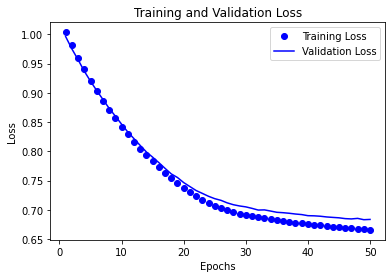

In [20]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

def train_model(params):
    model = Sequential()
    model.add(Dense(units=params['units'], activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(params['l1'])))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    loss = history.history['val_loss'][-1]
    return {'loss': loss, 'status': STATUS_OK}

space = {'lr': hp.loguniform('lr', -5, -1),
         'units': hp.quniform('units', 32, 128, 16),
         'l1': hp.loguniform('l1', -5, -1)}

trials = Trials()
best = fmin(train_model, space, algo=tpe.suggest, max_evals=50, trials=trials)

best_model = Sequential()
best_model.add(Dense(units=int(best['units']), activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(best['l1'])))
best_model.add(Dense(units=1, activation='sigmoid'))
best_model.compile(optimizer=Adam(lr=best['lr']), loss='binary_crossentropy', metrics=['accuracy'])
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

